# **Project Objective**

To extract actionable insights from property listings on Zameen.com such as pricing trends, neighbourhood comparisons, and listing quality that can help real estate investors make informed decisions.


# **1. Problem Statement**

**Define the business question: What drives property prices in Pakistan?**

Property prices in Pakistan are known to be influenced by the following factors:

1. Land size, land location, land use (residential and commercial)
2. Land administration
3. Construction costs which include labor and material
4. Building specifications and amenities

It's important to use real estate data to analyze which variables affect the pricing for informed decision by the stakeholders i.e. property buyers, sellers, developers and government regulatory bodies and policy makers.

I will analyze the effect of variables on property prices
with a scraped real estate dataset from Zameen.com.

# **2. Data Understanding and Preprocessing**

## Import Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

## Read dataset

In [4]:
zameen_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1jnt2UEGt-R2pKlUslVcdHwqwysrekoAZ/export?format=csv&ouid=101079242713837232910&rtpof=true&sd=true')

## View Basic Information

In [5]:
zameen_data.head(3)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rows, cols = zameen_data.shape
print(f'There are {rows} rows and {cols} columns in the dataset.')

There are 18255 rows and 59 columns in the dataset.


In [7]:
zameen_data['City'].nunique()

84

In [8]:
zameen_data.describe(include = 'all')

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
count,18239,18255,18255,18239,18239,18239,18239,18239,14893,11940.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,16064,18255,84,7,468,1022,2,1051,13617,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,House For Sale,https://www.zameen.com/Property/dera_ghazi_kha...,Karachi,House,5 Marla,PKR\n60 Thousand,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",Marriott Estate And Builders Offer a Ideal Hou...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,43,1,1250,13386,3528,269,11126,1884,33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1967.123744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949.941225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
zameen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

## **Handle Duplicates**

In [10]:
zameen_data.duplicated().sum()

print(f'There are {zameen_data.duplicated().sum()} duplicates in the dataset.')

There are 0 duplicates in the dataset.


In [11]:
zameen_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
18250,False
18251,False
18252,False
18253,False


# **3. Missing Values Treatment**

 ## **Identify missing values using .isnull().sum()**

In [12]:
zameen_data.isnull().sum()

,0
Title,16
URL,0
City,0
Type,16
Area,16
Price,16
Purpose,16
Location,16
Description,3362
Built in year,6315


In [13]:
# checked random sample to confirm that null columns are empty

zameen_data.sample(50)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
18028,6 Marla New House Available For In Kent Housi...,https://www.zameen.com/Property/chenab_rangers...,Sialkot,House,6 Marla,PKR\n75 Thousand,For,"Chenab Rangers Road, Sialkot, Punjab",NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,Beautiful House House Is For Sale,https://www.zameen.com/Property/faisalabad_sit...,Faisalabad,House,1 Kanal,PKR\n13 Crore,For Sale,"Sitara Sapna City, Faisalabad, Punjab",You can find properties for sale easily enough...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17847,Stylish 500 Sq Yards Bungalow For In GOR Colo...,https://www.zameen.com/Property/hyderabad_gor_...,Hyderabad,Lower Portion,500 Sq. Yd.,PKR\n70 Thousand,For,"GOR Colony, Hyderabad, Sindh",Spacious 500 Sq Yards Bungalow Available For ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12409,6 Marla Neat Upper Daid Storey In Phase 5B,https://www.zameen.com/Property/ghauri_town_gh...,Islamabad,Upper Portion,6 Marla,PKR\n50 Thousand,For,"Ghauri Town, Islamabad, Islamabad Capital",NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13483,4 Marla Ground Portion For,https://www.zameen.com/Property/islamabad_d-12...,Islamabad,Lower Portion,4 Marla,PKR\n65 Thousand,For,"D-12, Islamabad, Islamabad Capital",4 marla ground portion available for \n2 bed ...,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5499,"54 Marla 6 Bedroom Unique House, Prime Locatio...",https://www.zameen.com/Property/bahria_town_ra...,Rawalpindi,House,2.7 Kanal,PKR\n26.5 Crore,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",Bahria Town Rawalpindi Islamabad \nintellectua...,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15390,Full House For Scheme 3 Rawalpindi,https://www.zameen.com/Property/chaklala_schem...,Rawalpindi,House,14 Marla,PKR\n2 Lakh,For,"Chaklala Scheme, Rawalpindi, Punjab","Full house for , main scheme 3 Rawalpindi\n5 B...",2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,1-Bedroom apartment with Private Plunge Pool S...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,96 Sq. Yd.,PKR\n3.48 Crore,For Sale,"DHA Defence, Karachi, Sindh",Escape to your private paradise with this char...,2029.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7396,"Park Facing, Double Storey 150 Square Yards In...",https://www.zameen.com/Property/ink_city_ink_c...,Hyderabad,House,150 Sq. Yd.,PKR\n2.15 Crore,For Sale,"Jamshoro Road, Hyderabad, Sindh",Ground floor: \n1 master bed attah bath\nkitch...,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,10 Marla Brand New House For Sale,https://www.zameen.com/Property/peshawar_dha_d...,Peshawar,House,10 Marla,PKR\n4.7 Crore,For Sale,"DHA Defence, Peshawar, Khyber Pakhtunkhwa",Brand New 10 Marla House for Sale in DHA Pesha...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Delete null columns**
Find and delete columns that are completely empty with condition statement

Justification: Columns with more than 50% null values must be deleted as they are more than the 50% threshold.

In [14]:
threshold = 0.5 * len (zameen_data)
threshold

9127.5

In [15]:
null_columns = zameen_data.isnull().sum()[zameen_data.isnull().sum() == 18255]
null_columns

,0
Double Glazed Windows,18255
Central Air Conditioning,18255
Central Heating,18255
Flooring,18255
Electricity Backup,18255
Waste Disposal,18255
Other Main Features,18255
Furnished,18255
Drawing Room,18255
Dining Room,18255


In [16]:
zameen_data.drop(null_columns.index, axis = 1, inplace = True)

In [17]:
zameen_data.isnull().sum()

,0
Title,16
URL,0
City,0
Type,16
Area,16
Price,16
Purpose,16
Location,16
Description,3362
Built in year,6315


The threshold for missing values in a column is 9127.5. The column Floors has 9889 missing values. Although, floors affect property rates, imputing values for 9889 buildings and over 50% missing values is not reasonable. So this column will also be dropped.

In [18]:
zameen_data.drop('Floors', axis = 1, inplace = True)

In [19]:
zameen_data.isnull().sum()

,0
Title,16
URL,0
City,0
Type,16
Area,16
Price,16
Purpose,16
Location,16
Description,3362
Built in year,6315


Title column with null values only has URL and City data. All other columns including price are null. So, these rows will be deleted as no relevant analysis can be achieved.

In [20]:
zameen_data[zameen_data['Title'].isnull()]

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
683,NaN,https://www.zameen.com/Property/scheme_33_sect...,Karachi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,https://www.zameen.com/new-projects/warda_hamn...,Islamabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2447,NaN,https://www.zameen.com/new-projects/ivory-2090...,Islamabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2469,NaN,https://www.zameen.com/new-projects/river_hill...,Islamabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,https://www.zameen.com/new-projects/prime_city...,Faisalabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,NaN,https://www.zameen.com/new-projects/prime_city...,Faisalabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3764,NaN,https://www.zameen.com/new-projects/golf_view_...,Multan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3787,NaN,https://www.zameen.com/new-projects/platinum_h...,Multan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4165,NaN,https://www.zameen.com/new-projects/downtown_r...,Multan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4279,NaN,https://www.zameen.com/new-projects/boulevard_...,Multan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
zameen_data.dropna(subset = ['Title'], inplace = True)

In [22]:
zameen_data[zameen_data['Title'].isnull()]

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms


In [23]:
zameen_data.isnull().sum()

,0
Title,0
URL,0
City,0
Type,0
Area,0
Price,0
Purpose,0
Location,0
Description,3346
Built in year,6299


## **Impute with mode/mean/forward-fill for categorical/numerical**

- Add mode value for Built in Year, Parking Spaces, Servant Quarters, Kitchens and Store Rooms
- Add placeholder value (not available) : Description

In [24]:
mode_parking = zameen_data['Parking Spaces'].mode()
mode_parking

,Parking Spaces
0,1.0


In [25]:
zameen_data['Parking Spaces'].fillna(mode_parking[0], inplace = True)

/tmp/ipython-input-3109294912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zameen_data['Parking Spaces'].fillna(mode_parking[0], inplace = True)


In [26]:
mode_servant = zameen_data['Servant Quarters'].mode()
mode_kitchens = zameen_data['Kitchens'].mode()
mode_store = zameen_data['Store Rooms'].mode()

In [27]:
zameen_data['Servant Quarters'].fillna(mode_servant[0], inplace = True)
zameen_data['Kitchens'].fillna(mode_kitchens[0], inplace = True)
zameen_data['Store Rooms'].fillna(mode_store[0], inplace = True)

/tmp/ipython-input-3045073908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zameen_data['Servant Quarters'].fillna(mode_servant[0], inplace = True)
/tmp/ipython-input-3045073908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

**Description missing values are replaced with a placeholder 'Not Available' as it only describes property details.**

In [28]:
zameen_data['Description'].fillna('Not Available', inplace = True)

/tmp/ipython-input-1032481571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zameen_data['Description'].fillna('Not Available', inplace = True)


- Built in year missing values are replaced with forward fill so that all available years can have an equal chance at being represented.
- Year column has 6299 missing values so assigning 2024 as a mode value would result in a biased analysis.

In [29]:
mode_year = zameen_data['Built in year'].mode()
mode_year

,Built in year
0,2024.0


In [30]:
zameen_data['Built in year'].fillna(mode_year[0], inplace = True)

/tmp/ipython-input-3274795321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zameen_data['Built in year'].fillna(mode_year[0], inplace = True)


**All missing values have been dealt with!**

In [31]:
zameen_data.isnull().sum().sum()

np.int64(0)

# **4. Data Cleaning & Consistency**

## Change wrong datatypes

In [32]:
zameen_data.dtypes
# wrong data types = built in year, parking spaces, bedrooms, bathrooms, servant quarters, kitchens, storerooms

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,object
Purpose,object
Location,object
Description,object
Built in year,float64


Convert price to float

Use loop to convert parking spaces, bedrooms, bathrooms, servant quarters, kitchens, storerooms to integer

In [33]:
Columns = ['Parking Spaces', 'Bedrooms', 'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms']

for Col in Columns:
  zameen_data[Col] = pd.to_numeric(zameen_data[Col], errors = 'coerce')

Convert built in year to integer. There is no complete datetime data, it was converted into integer.

In [34]:
zameen_data['Built in year'].head(3)

,Built in year
0,2024.0
1,2024.0
2,2024.0


In [35]:
zameen_data['Built in year'] = zameen_data['Built in year'].astype(float).astype(int)

In [36]:
zameen_data.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,object
Purpose,object
Location,object
Description,object
Built in year,int64


## Fix wrong values in the built in year column

In [37]:
zameen_data['Built in year'].sort_values().unique()

array([     0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,     14,     15,     17,
           18,     20,     22,     23,     24,     25,     27,     40,
          202,    204,    205,    215,    219,    225,    240,    786,
         1011,   1836,   1980,   1981,   1982,   1984,   1985,   1988,
         1990,   1992,   1994,   1995,   1997,   1998,   1999,   2000,
         2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017,   2018,   2019,   2020,   2021,   2022,   2023,   2024,
         2025,   2026,   2027,   2028,   2029,   2030,   2034,   2050,
         2052,   2054,   2222,   3025,  20018,  20188,  20218,  20219,
        20222,  20223,  20224,  20225,  20242, 202122])

In [38]:
print(zameen_data['Built in year'].min(), zameen_data['Built in year'].max())

0 202122


In [39]:
valid_min, valid_max = 1836, 2030

In [40]:
error_years = zameen_data[(zameen_data['Built in year'] < valid_min) | (zameen_data['Built in year'] > valid_max) ]
error_years

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2,1.0,1.0,2.0,1.0,4.0,1.0
15,Bathisland 250 Square Yard Bungalow For Sale,https://www.zameen.com/Property/karachi_bath_i...,Karachi,House,250 Sq. Yd.,PKR\n7.5 Crore,For Sale,"Bath Island, Karachi, Sindh",BUANGLOW FOR SALE \n\n\nBATHISLAND \n\n250 YAR...,15,2.0,4.0,4.0,1.0,1.0,1.0
18,3 Bedroom Apartment For Sale Clifton Block 5,https://www.zameen.com/Property/clifton_clifto...,Karachi,Flat,211 Sq. Yd.,PKR\n3.9 Crore,For Sale,"Clifton, Karachi, Sindh",*Flat For Sale* \nProject:Small complex. \n\n*...,15,1.0,3.0,3.0,1.0,1.0,1.0
19,Ground Floor 3 Bedroom Apartment For Sale,https://www.zameen.com/Property/karachi_bath_i...,Karachi,Flat,222 Sq. Yd.,PKR\n3.6 Crore,For Sale,"Bath Island, Karachi, Sindh",*Flat For Sale* \nProject: Aysha Apartments. \...,12,1.0,3.0,4.0,1.0,1.0,1.0
20,3 Bedroom Apartment For Sale In Clifton Block 5,https://www.zameen.com/Property/clifton_clifto...,Karachi,Flat,189 Sq. Yd.,PKR\n3.45 Crore,For Sale,"Clifton, Karachi, Sindh",*Flat For Sale* \nProject:Small complex. \n\n*...,15,1.0,3.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,Flat Double Bed Room With Attached Bath,https://www.zameen.com/Property/jhelum_citi_ho...,Jhelum,Flat,4 Marla,PKR\n45 Thousand,For,"Citi Housing Scheme, Jhelum, Punjab",Not Available,8,2.0,2.0,2.0,1.0,1.0,1.0
18013,Fully Ready 5 Marla House For In City Housing...,https://www.zameen.com/Property/citi_housing_s...,Sialkot,House,5 Marla,PKR\n60 Thousand,For,"Citi Housing Society, Sialkot, Punjab",i'm fatima \nA fully ready 5 Marla house is av...,2,1.0,3.0,4.0,1.0,2.0,1.0
18014,"""Well-Maintained 10 Marla al Home in City Hous...",https://www.zameen.com/Property/citi_housing_s...,Sialkot,House,10 Marla,PKR\n95 Thousand,For,"Citi Housing Society, Sialkot, Punjab",i'm fatima \nA fully ready 10 Marla house is a...,1,1.0,5.0,6.0,1.0,2.0,1.0
18035,B Block 10 Marla Luxury Brand New House Availa...,https://www.zameen.com/Property/sialkot_citi_h...,Sialkot,House,10 Marla,PKR\n70 Thousand,For,"Citi Housing Society, Sialkot, Punjab",B block 10marla luxury brand new Spanish struc...,1,1.0,5.0,6.0,1.0,1.0,1.0


In [41]:
error_years['Built in year'].value_counts().sum()

np.int64(537)

In [42]:
error_years['Built in year'].value_counts().sort_index()

,count
Built in year,
0,28
1,176
2,125
3,30
4,20
5,31
6,7
7,8
8,5


In [43]:
wrong_correct_years = {
    20018: 2018,
    20188: 2018,
    20222: 2022,
    20223: 2022,
    20224: 2024,
    20225: 2025,
    20242: 2024,
    202122: 2021
}
wrong_correct_years

{20018: 2018,
 20188: 2018,
 20222: 2022,
 20223: 2022,
 20224: 2024,
 20225: 2025,
 20242: 2024,
 202122: 2021}

In [44]:
zameen_data['Built in year'].replace(wrong_correct_years, inplace=True)

/tmp/ipython-input-2913013104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zameen_data['Built in year'].replace(wrong_correct_years, inplace=True)


In [45]:
wrong_years = error_years['Built in year'].unique()
wrong_years

array([     2,     15,     12,     20,     25,      0,      9,      1,
          786,  20219,      5,    205,      6,      3,   2050,  20223,
           23,      4,     24,    204,     10,     18,     11,      7,
        20242,   3025,   2054,    202,   2052,     40,     17,     14,
          225,    219,      8,     27,  20224,  20018,    215,     22,
         2222,  20218,    240,  20222,  20225, 202122,   2034,   1011,
        20188])

In [46]:
zameen_data.loc[zameen_data['Built in year'].isin(wrong_years), 'Built in year'] = mode_year[0]

In [47]:
zameen_data['Built in year'].value_counts().sort_index()

,count
Built in year,
1836,1
1980,4
1981,1
1982,1
1984,1
1985,1
1988,2
1990,21
1992,4


Year entries with future years are kept as they are developing projects with a completion date set in future.

In [48]:
zameen_data['Built in year'].isnull().sum()

np.int64(0)

## **Fix format of Price column**

In [49]:
zameen_data['Price']

,Price
0,PKR\n4.75 Crore
1,PKR\n6.25 Crore
2,PKR\n3.45 Crore
3,PKR\n2.98 Crore
4,PKR\n4.65 Crore
...,...
18250,PKR\n40 Thousand
18251,PKR\n14 Thousand
18252,PKR\n40 Thousand
18253,PKR\n1 Lakh


In [50]:
zameen_data['Price'] = zameen_data['Price'].str.replace('PKR', '')
zameen_data['Price'] = zameen_data['Price'].str.replace('\n', '')

In [51]:
zameen_data['Price'] = zameen_data['Price'].str.strip()

In [52]:
def convert_price(price):
    price = str(price).lower()  # convert number to string safely

    if 'arab' in price:
        return float(price.split()[0]) * 1000000000
    elif 'crore' in price:
        return float(price.split()[0]) * 10000000
    elif 'lakh' in price:
        return float(price.split()[0]) * 100000
    elif 'million' in price:
        return float(price.split()[0]) * 1000000
    elif 'thousand' in price:
        return float(price.split()[0]) * 1000
    else:
        return float(price)

In [53]:
zameen_data['Price'] = zameen_data['Price'].apply(convert_price)

In [54]:
zameen_data['Price'] = zameen_data['Price'].astype(int)

In [55]:
zameen_data['Price'].isnull().sum()

np.int64(0)

In [56]:
zameen_data['Price']

,Price
0,47500000
1,62500000
2,34500000
3,29800000
4,46500000
...,...
18250,40000
18251,14000
18252,40000
18253,100000


In [57]:
zameen_data.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,int64
Purpose,object
Location,object
Description,object
Built in year,int64


## **Convert Area into Sqft**

One listing has an area of 45000 kanal in Lahore which appears to be a mistype and the price is the rental value of Rs. 200,000. So the area will be replaced with the area of a rental home with the same number of bedrooms and bathroom in the same locality. It matches 1 kanal rental homes at 200,000 rent with 6 bedrooms and 5-6 bathrooms in Lahore.

In [58]:
zameen_data[zameen_data['Area'] == '45,000 Kanal']

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
17314,LDA Avenue One D Block Kanal Brand New Double ...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,"45,000 Kanal",200000,For,"LDA Avenue, Lahore, Punjab",Not Available,2024,4.0,6.0,6.0,1.0,2.0,1.0


In [59]:
zameen_data[(zameen_data['Price'] == 200000.0) & (zameen_data['City'] == 'Lahore')]

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms


In [60]:
zameen_data.loc[zameen_data['Area'] == '45,000 Kanal', 'Area'] = '1 Kanal'

In [61]:
zameen_data[zameen_data['Location'] == 'LDA Avenue, Lahore, Punjab']

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
8671,10 Marla Brand New Luxury Spanish Style Well H...,https://www.zameen.com/Property/lahore_lda_ave...,Lahore,House,10 Marla,39000000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla Brand New Luxury Double Storey Spanis...,2022,100.0,5.0,6.0,1.0,3.0,2.0
8808,House Of 10 Marla Is Available For sale In LDA...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,10 Marla,39000000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla brand new house for sale in LDA Avenu...,2024,1.0,6.0,6.0,1.0,2.0,2.0
8829,LDA Avenue - Block M House For Sale Sized 10 M...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,10 Marla,37000000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla brand new house for sale in lda avenu...,2024,1.0,5.0,6.0,1.0,2.0,2.0
8885,10 Marla Luxurious Modern Design House For Sale,https://www.zameen.com/Property/lahore_lda_ave...,Lahore,House,10 Marla,39000000,For Sale,"LDA Avenue, Lahore, Punjab",Having Seven Bedrooms Attached Washrooms\n1st ...,2024,1.0,7.0,6.0,1.0,2.0,1.0
8928,Highly-Coveted 1 Kanal House Is Available In L...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,1 Kanal,38500000,For Sale,"LDA Avenue, Lahore, Punjab",1 Kanal Brand New House For Sale In LDA Avenue...,2024,1.0,3.0,4.0,1.0,2.0,1.0
9044,Prominently-Located House Available In LDA Ave...,https://www.zameen.com/Property/lahore_lda_ave...,Lahore,House,10 Marla,38000000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla Brand new house for sale in LDA Avenu...,2024,1.0,6.0,6.0,1.0,2.0,2.0
9065,End Your Search For House Here And sale Now,https://www.zameen.com/Property/lahore_lda_ave...,Lahore,House,10 Marla,39500000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla Brand new house for sale in LDA Avenu...,2024,1.0,7.0,6.0,1.0,2.0,2.0
9192,10 Marla House In LDA Avenue Is Available For ...,https://www.zameen.com/Property/lahore_lda_ave...,Lahore,House,10 Marla,32500000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla brand new house for sale in LDA avenu...,1999,2.0,6.0,6.0,1.0,2.0,2.0
9213,10 Marla House In Stunning LDA Avenue - Block ...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,10 Marla,33500000,For Sale,"LDA Avenue, Lahore, Punjab",10 Marla Brand New House For Sale In Raiwind R...,2022,1.0,6.0,6.0,1.0,2.0,1.0
16988,1 Kanal Like Brand New House For Lda Avenue S...,https://www.zameen.com/Property/lda_avenue_lda...,Lahore,House,1 Kanal,190000,For,"LDA Avenue, Lahore, Punjab",1 Kanal Like Brand New Double Story House For ...,2024,4.0,6.0,6.0,1.0,2.0,1.0


In [62]:
def convert_area(text):
    text = text.lower().replace(",", "").replace(".", "").strip()

    if "marla" in text:
        return float(text.replace("marla", "").strip()) * 272
    elif "kanal" in text:
        return float(text.replace("kanal", "").strip()) * 5445
    elif "sq yd" in text:
        return float(text.replace("sq yd", "").strip()) * 9
    elif "sq ft" in text or "sqft" in text:
        return float(text.replace("sq ft", "").replace("sqft", "").strip())
    else:
        return None

In [63]:
zameen_data["Area_sqft"] = zameen_data["Area"].apply(convert_area)

In [64]:
zameen_data.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,int64
Purpose,object
Location,object
Description,object
Built in year,int64


In [65]:
zameen_data.head()

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,47500000,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,2024,1.0,2.0,2.0,1.0,2.0,1.0,1152.0
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,62500000,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,2024,1.0,2.0,3.0,1.0,1.0,1.0,1449.0
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,34500000,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,2024,1.0,1.0,2.0,1.0,2.0,1.0,999.0
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,29800000,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2024,1.0,1.0,2.0,1.0,4.0,1.0,954.0
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,46500000,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,2024,1.0,2.0,2.0,1.0,2.0,1.0,1404.0


**Replace 0 sqft values with area sqft mode**

In [66]:
mode_areasqft = zameen_data['Area_sqft'].mode()
mode_areasqft

,Area_sqft
0,1360.0


In [67]:
zameen_data.loc[zameen_data['Area_sqft'] < 1, 'Area_sqft'] = mode_areasqft

In [68]:
zameen_data['Area_sqft'].value_counts().sort_index()

,count
Area_sqft,
72.0,1
117.0,2
126.0,1
198.0,2
243.0,4
...,...
816750.0,1
1187010.0,1
1726065.0,1


Use: FuzzyWuzzy, custom functions

## **Standardize city names using Fuzzy Matching**

In [69]:
!pip install fuzzywuzzy python-levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.8 MB/s eta 0:00:00


In [70]:
from fuzzywuzzy import fuzz, process

In [71]:
zameen_data['City'].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Nowshera', 'Mardan',
       'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan', 'Okara',
       'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar', 'Kasur',
       'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas', 'Swat',
       'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran',
       'Pakpattan', 'Chiniot', 'Dera Ismail Khan', 'Fateh Jang',
       'Burewala', 'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro',
       'Galyat', 'Gujranwala', 'Kharian', 'Karachi ', 'Islamabad ',
       'Faisalabad ', 'Multan ', 'Rawalpindi ', 'Gujranwala ',
       'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ', 'Sialkot  ',
       'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Wah ', 'Gujrat ',
       'Sahiwal ', 'Sheikhupura ', 'Sarg

In [72]:
reference_list = zameen_data['City'].str.strip().str.title().unique().tolist()
reference_list

['Karachi',
 'Islamabad',
 'Faisalabad',
 'Multan',
 'Rawalpindi',
 'Peshawar',
 'Jhelum',
 'Murree',
 'Hyderabad',
 'Bahawalpur',
 'Sialkot',
 'Abbottabad',
 'Sahiwal',
 'Lahore',
 'Gujrat',
 'Wah',
 'Sargodha',
 'Sheikhupura',
 'Chakwal',
 'Nowshera',
 'Mardan',
 'Chilas',
 'Sarai Alamgir',
 'Quetta',
 'Rahim Yar Khan',
 'Okara',
 'Attock',
 'Dera Ghazi Khan',
 'Taxila',
 'Sukkur',
 'Gwadar',
 'Kasur',
 'Mirpur',
 'Haripur',
 'Gujar Khan',
 'Gharo',
 'Mirpur Khas',
 'Swat',
 'Daska',
 'Sadiqabad',
 'Buner',
 'Jhang',
 'Lalamusa',
 'Lodhran',
 'Pakpattan',
 'Chiniot',
 'Dera Ismail Khan',
 'Fateh Jang',
 'Burewala',
 'Hafizabad',
 'Talagang',
 'Vehari',
 'Jamshoro',
 'Galyat',
 'Gujranwala',
 'Kharian']

In [73]:
def correct_city_names(name):
  match, score = process.extractOne(name, reference_list)
  return match

In [74]:
zameen_data['City'] = zameen_data['City'].apply(correct_city_names)

In [75]:
zameen_data['City'].value_counts()

,count
City,
Karachi,2497
Rawalpindi,2496
Islamabad,2486
Lahore,2460
Multan,1618
Faisalabad,1608
Gujranwala,1576
Peshawar,1143
Sialkot,487


## **Detect and correct inconsistent property types**

Property type seems correct and no inconsistencies found

In [76]:
zameen_data['Type'].unique()

array(['Flat', 'House', 'Upper Portion', 'Lower Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

In [77]:
zameen_data['Type'].value_counts()

,count
Type,
House,13386
Flat,2892
Upper Portion,1247
Lower Portion,560
Farm House,89
Room,43
Penthouse,22


##  **Remove outliers using IQR/Z-score**

### **IQR method**

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

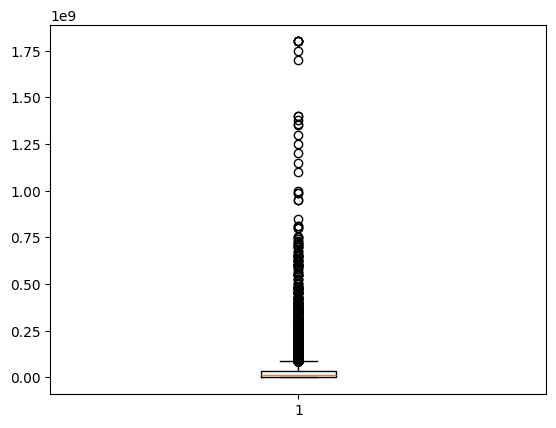

In [79]:
plt.boxplot(zameen_data['Price'])
plt.show()

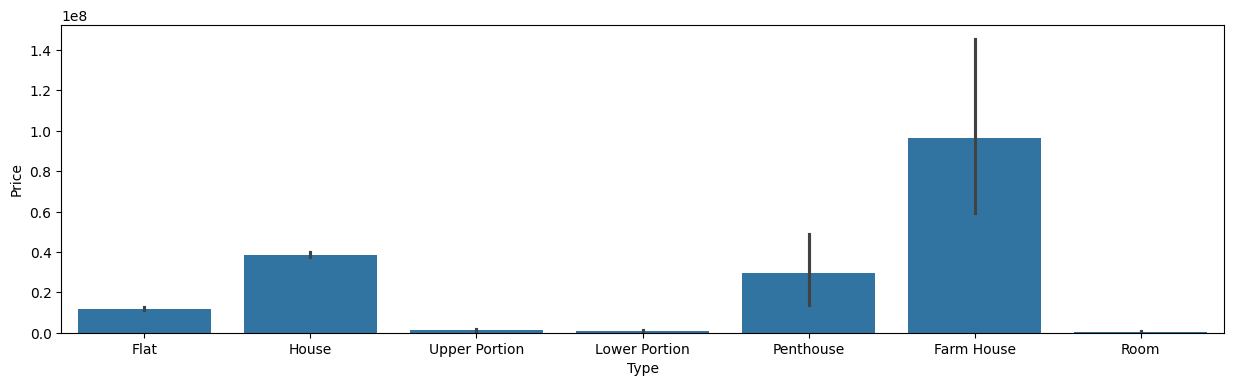

In [80]:
plt.figure(figsize=(15,4))
sns.barplot(x = zameen_data['Type'], y = zameen_data['Price'])
plt.show()

In [81]:
Q1 = zameen_data['Price'].quantile(0.25)
Q3 = zameen_data['Price'].quantile(0.75)

IQR = Q3 - Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

In [82]:
Lower_bound

np.float64(-51387500.0)

In [83]:
Upper_bound

np.float64(86032500.0)

In [84]:
iqr_outlier = zameen_data[(zameen_data['Price'] < Lower_bound) | (zameen_data['Price'] > Upper_bound)]
iqr_outlier

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft
13,250 SQYD Town House for SALE at PECHS nearby F...,https://www.zameen.com/Property/jamshed_town_p...,Karachi,House,250 Sq. Yd.,105000000,For Sale,"Jamshed Town, Karachi, Sindh",Slightly Used *Town House *250 SQYD* available...,2024,1.0,5.0,6.0,1.0,2.0,1.0,2250.0
23,3 Sided Sea Facing Flat In HMR Waterfront 3 Be...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,262 Sq. Yd.,105000000,For Sale,"DHA Defence, Karachi, Sindh",Why Invest In HMR Waterfront?\nCorner Plot\n3 ...,2024,1.0,3.0,5.0,1.0,2.0,1.0,2358.0
39,BRAND NEW 1000 YARDS BUNGALOW FOR SALE,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",394000000,For Sale,"DHA Defence, Karachi, Sindh",*DHA Karachi Luxury 1000-Yard Bungalow for Sal...,2024,1.0,6.0,6.0,1.0,2.0,1.0,9000.0
44,Brand New House for Sale,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,500 Sq. Yd.,230000000,For Sale,"DHA Defence, Karachi, Sindh",Architect-designed Brand New 500 Sq. Yards Hou...,2024,2.0,5.0,6.0,1.0,1.0,1.0,4500.0
45,Bungalow For Sale,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",175000000,For Sale,"DHA Defence, Karachi, Sindh",*BUNGALOW FOR SALE*\n\n*1000 YARD*\n*2+3 BEDRO...,2011,4.0,5.0,6.0,2.0,2.0,1.0,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10828,Good Location Garden Town Phase 3 House Sized ...,https://www.zameen.com/Property/garden_town_ga...,Gujranwala,House,1 Kanal,87500000,For Sale,"Garden Town, Gujranwala, Punjab",Not Available,2024,1.0,8.0,6.0,1.0,2.0,1.0,5445.0
10878,Fair-Priced Facing Park 30 Marla House Availab...,https://www.zameen.com/Property/gujranwala_rah...,Gujranwala,House,1.5 Kanal,130000000,For Sale,"Rahwali Cantt, Gujranwala, Punjab",Not Available,2025,5.0,6.0,6.0,1.0,2.0,1.0,81675.0
10880,Centrally Located House In Wapda Town - Block ...,https://www.zameen.com/Property/wapda_town_wap...,Gujranwala,House,1.3 Kanal,90000000,For Sale,"Wapda Town, Gujranwala, Punjab",The end users find Wapda Town - Block B1 the b...,2024,1.0,6.0,6.0,1.0,2.0,1.0,70785.0
11052,Centrally Located Facing Park House In Citi Ho...,https://www.zameen.com/Property/citi_housing_p...,Gujranwala,House,1 Kanal,90000000,For Sale,"Citi Housing Society, Gujranwala, Punjab","A well-constructed property is up for sale, ha...",2024,1.0,6.0,6.0,1.0,2.0,1.0,5445.0


### **Z-Score method**

In [85]:
mean_price = zameen_data['Price'].mean()
mean_price

np.float64(30918333.208838202)

In [86]:
std_price = zameen_data['Price'].std()
std_price

77193773.37354863

In [87]:
zameen_data['z_score'] = (zameen_data['Price'] - mean_price) / std_price

In [88]:
zameen_data.head()

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,47500000,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,2024,1.0,2.0,2.0,1.0,2.0,1.0,1152.0,0.214806
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,62500000,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,2024,1.0,2.0,3.0,1.0,1.0,1.0,1449.0,0.409122
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,34500000,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,2024,1.0,1.0,2.0,1.0,2.0,1.0,999.0,0.046398
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,29800000,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2024,1.0,1.0,2.0,1.0,4.0,1.0,954.0,-0.014487
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,46500000,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,2024,1.0,2.0,2.0,1.0,2.0,1.0,1404.0,0.201851


In [89]:
zameen_data[(zameen_data['z_score'] < -3) | (zameen_data['z_score'] > 3)]

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score
39,BRAND NEW 1000 YARDS BUNGALOW FOR SALE,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",394000000,For Sale,"DHA Defence, Karachi, Sindh",*DHA Karachi Luxury 1000-Yard Bungalow for Sal...,2024,1.0,6.0,6.0,1.0,2.0,1.0,9000.0,4.703510
75,1000 Yard Brand New House Available For Sale,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",350000000,For Sale,"DHA Defence, Karachi, Sindh",Not Available,2024,5.0,6.0,7.0,2.0,2.0,1.0,9000.0,4.133516
127,Dha Phase 6 1000 Square Yard Brand New Bungalo...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",420000000,For Sale,"DHA Defence, Karachi, Sindh",Dha phase 6 1000 sq yard brand new bungalow 2+...,2024,5.0,6.0,6.0,1.0,2.0,1.0,9000.0,5.040324
128,1000 Square Yard Dha Phase 6 Brand New Bungalo...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",350000000,For Sale,"DHA Defence, Karachi, Sindh",Dha phase 6 1000 sq yard brand new bungalow 2+...,2024,5.0,6.0,6.0,1.0,2.0,1.0,9000.0,4.133516
149,1000 Sq Yard Brand New Bungalow Full Furnished...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,House,"1,000 Sq. Yd.",450000000,For Sale,"DHA Defence, Karachi, Sindh",Only a quick decision can lead you to buy the ...,2024,5.0,6.0,6.0,1.0,2.0,1.0,9000.0,5.428957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,2 Kanal Brand New Luxury Ultra-Modern Design M...,https://www.zameen.com/Property/dha_phase_6_dh...,Lahore,House,2 Kanal,340000000,For Sale,"DHA Defence, Lahore, Punjab",SYED BROTHERS OFFERS:\n\n100% Original Picture...,2025,8.0,6.0,7.0,2.0,3.0,2.0,10890.0,4.003971
8995,NEAR TO RAYA 2 Kanal Modern Designed FULL BASM...,https://www.zameen.com/Property/dha_phase_6_dh...,Lahore,House,2 Kanal,430000000,For Sale,"DHA Defence, Lahore, Punjab",Features Of Property:-\n5 Bed Rooms With Attac...,2025,4.0,5.0,6.0,2.0,2.0,2.0,10890.0,5.169869
9020,HOT LOCATION FULLY FURNISHED 2-KANAL MODERN DE...,https://www.zameen.com/Property/dha_phase_6_dh...,Lahore,House,2 Kanal,490000000,For Sale,"DHA Defence, Lahore, Punjab",RIASAT ESTATE OFFERS !\nHOT LOCATION FULLY FUR...,2025,5.0,6.0,7.0,2.0,2.0,2.0,10890.0,5.947133
9105,Brand New 2 Kanal House Available In Model Tow...,https://www.zameen.com/Property/model_town_mod...,Lahore,House,2 Kanal,350000000,For Sale,"Model Town, Lahore, Punjab",2 KANAL BRAND NEW FURNISHED DOUBLE STOREY HOUS...,2010,2.0,6.0,6.0,1.0,2.0,1.0,10890.0,4.133516


In [90]:
zameen_data.drop(zameen_data[(zameen_data['z_score'] < -3) | (zameen_data['z_score'] > 3)].index, inplace = True)

In [91]:
zameen_data[(zameen_data['z_score'] < -3) | (zameen_data['z_score'] > 3)]

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score


Note: 261 rows with outlier prices were deleted as they had highly skewed values that would negatively affect our analysis. In real estate, sellers and property dealers are in the practice of deliberately stating inflated prices to increase the resale and rental values of their properties. Currently, market rates are heavily reliant on speculation. There is no defined range. In order, to impute values, it is important to have a defined rate for given property which is a lengthy process. In this project, we are only focusing on cleaning and analysis based on reasonable assumptions, so I deleted the outliers.  

# **5. Feature Engineering**

Create new features to drive more insightful analysis

Create two columns for the following:

1. Add price/size of property
2. Age of Property

## **Add Column Age of Property**

Note: Age of property is helpful in assessing if the price is reasonable or over-inflated. Older properties were cheaper to build than today, hence the price should be lower than a new property in the same locality and size.

In [92]:
zameen_data['Age of Property'] = 2025 - zameen_data['Built in year']
zameen_data.sample(3)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score,Age of Property
14533,12 Marla Ground Portion,https://www.zameen.com/Property/rawalpindi_med...,Rawalpindi,Lower Portion,12 Marla,80000,For,"Media Town, Rawalpindi, Punjab",12 Marla Ground Portion Water Bor Electricity ...,2024,1.0,3.0,3.0,1.0,2.0,1.0,3264.0,-0.399492,1
1788,Spanish Design House For Sale,https://www.zameen.com/Property/islamabad_bani...,Islamabad,House,11 Marla,48000000,For Sale,"Bani Gala, Islamabad, Islamabad Capital",11 Marla luxury Spanish Design House for sale ...,2024,2.0,5.0,6.0,1.0,2.0,1.0,2992.0,0.221283,1
14676,10 Marla Brand New Luxury Designer Portion Ava...,https://www.zameen.com/Property/bahria_town_ra...,Rawalpindi,Lower Portion,10 Marla,55000,For,"Bahria Town Rawalpindi, Rawalpindi, Punjab",10 Marla Brand New Luxury Designer Portion Ava...,2024,2.0,3.0,3.0,1.0,1.0,1.0,2720.0,-0.399816,1


In [93]:
zameen_data['Area'].unique()

array(['128 Sq. Yd.', '161 Sq. Yd.', '111 Sq. Yd.', '106 Sq. Yd.',
       '156 Sq. Yd.', '217 Sq. Yd.', '240 Sq. Yd.', '200 Sq. Yd.',
       '300 Sq. Yd.', '189 Sq. Yd.', '131 Sq. Yd.', '250 Sq. Yd.',
       '178 Sq. Yd.', '211 Sq. Yd.', '222 Sq. Yd.', '262 Sq. Yd.',
       '370 Sq. Yd.', '98 Sq. Yd.', '157 Sq. Yd.', '500 Sq. Yd.',
       '272 Sq. Yd.', '375 Sq. Yd.', '120 Sq. Yd.', '59 Sq. Yd.',
       '139 Sq. Yd.', '151 Sq. Yd.', '1,000 Sq. Yd.', '600 Sq. Yd.',
       '72 Sq. Yd.', '125 Sq. Yd.', '233 Sq. Yd.', '350 Sq. Yd.',
       '206 Sq. Yd.', '150 Sq. Yd.', '306 Sq. Yd.', '160 Sq. Yd.',
       '267 Sq. Yd.', '152 Sq. Yd.', '550 Sq. Yd.', '167 Sq. Yd.',
       '1,008 Sq. Yd.', '83 Sq. Yd.', '194 Sq. Yd.', '122 Sq. Yd.',
       '94 Sq. Yd.', '235 Sq. Yd.', '210 Sq. Yd.', '356 Sq. Yd.',
       '317 Sq. Yd.', '14 Sq. Yd.', '80 Sq. Yd.', '96 Sq. Yd.',
       '133 Sq. Yd.', '294 Sq. Yd.', '230 Sq. Yd.', '511 Sq. Yd.',
       '333 Sq. Yd.', '244 Sq. Yd.', '256 Sq. Yd.', '467 Sq. Yd.',

## **Add Column Price/Area**

Price/area give us a true picture of relavant property rates per unit in the market. It also shows over-inflated properties.

In [94]:
zameen_data.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,int64
Purpose,object
Location,object
Description,object
Built in year,int64


In [95]:
zameen_data.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,object
Price,int64
Purpose,object
Location,object
Description,object
Built in year,int64


In [96]:
zameen_data['Price/Area'] = zameen_data['Price'] / zameen_data[('Area_sqft')]
zameen_data.sample(3)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score,Age of Property,Price/Area
5769,House 10 Marla For Sale In Bahria Town Phase 4,https://www.zameen.com/Property/bahria_town_ra...,Rawalpindi,House,10 Marla,51500000,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",Bahria Town Phase 4\nBrand New House \n5 bedro...,2024,1.0,5.0,NaN,1.0,2.0,2.0,2720.0,0.266623,1,18933.823529
8880,Rayan Construction Fully Luxury Modern Bungalo...,https://www.zameen.com/Property/dha_phase_7_dh...,Lahore,House,1 Kanal,64100000,For Sale,"DHA Defence, Lahore, Punjab",Proposal House \n\nONE KANAL Bungalow Details:...,2025,4.0,5.0,6.0,1.0,2.0,1.0,5445.0,0.429849,0,11772.268136
17880,5 Marla New House For,https://www.zameen.com/Property/citi_housing_s...,Sialkot,House,5 Marla,58000,For,"Citi Housing Society, Sialkot, Punjab",Not Available,2023,1.0,3.0,4.0,1.0,1.0,1.0,1360.0,-0.399777,2,42.647059


In [97]:
zameen_data['Price/Area'] = zameen_data['Price/Area'].round(2)

In [98]:
zameen_data.sample(3)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Area_sqft,z_score,Age of Property,Price/Area
6178,5 Bed Double Unit House Near Civic Centre,https://www.zameen.com/Property/bahria_town_ra...,Rawalpindi,House,1 Kanal,85000000,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",5 Bed Double Unit House near Civic Centre Phas...,2025,4.0,5.0,6.0,1.0,2.0,1.0,5445.0,0.700596,0,15610.65
6431,5 MARLA BRAND NEW HOUSE AT SHIEKH YASIN TOWN P...,https://www.zameen.com/Property/nasir_bagh_roa...,Peshawar,House,5 Marla,19500000,For Sale,"Nasir Bagh Road, Peshawar, Khyber Pakhtunkhwa",**5 Marla Brand New House for Sale**\n *Sheikh...,2025,2.0,8.0,NaN,1.0,2.0,1.0,1360.0,-0.147918,0,14338.24
6422,10 Marla Beautiful House in prime location in ...,https://www.zameen.com/Property/regi_model_tow...,Peshawar,House,10 Marla,50000000,For Sale,"Regi Model Town, Peshawar, Khyber Pakhtunkhwa",Get yourself a House that suits your needs per...,2025,3.0,10.0,6.0,1.0,3.0,1.0,2720.0,0.247192,0,18382.35


# **6. Univariate & Bivariate Analysis**

Use: matplotlib, seaborn, visualization library

## **Plot distributions of prices, area**

Create bins for price and area because the values are very large for charts

### **Create Bin for Price and Area**

**Price Qcut bin**

In [99]:
zameen_data['Price_qcut'] = pd.qcut(zameen_data['Price'], q = 5)
zameen_data['Price_qcut'].value_counts().sort_index()

,count
Price_qcut,
"(5999.999, 100000.0]",3746
"(100000.0, 4434600.0]",3445
"(4434600.0, 19500000.0]",3645
"(19500000.0, 39000000.0]",3601
"(39000000.0, 260000000.0]",3541


In [100]:
zameen_data['Price_qcut'] = pd.qcut(zameen_data['Price'], q = 5, labels = ['5k-100k','100k-4.4M','4.4M-19.5M','19.5M-39M','39M-260M'])

In [101]:
zameen_data['Price_qcut'].value_counts().sort_index()

,count
Price_qcut,
5k-100k,3746
100k-4.4M,3445
4.4M-19.5M,3645
19.5M-39M,3601
39M-260M,3541


In [102]:
zameen_data.columns

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'Area_sqft',
       'z_score', 'Age of Property', 'Price/Area', 'Price_qcut'],
      dtype='object')

**Area Qcut bin**

In [103]:
zameen_data['Area_size_qcut'] = pd.qcut(zameen_data['Area_sqft'], q = 5)

In [104]:
zameen_data['Area_size_qcut'].value_counts().sort_index()

,count
Area_size_qcut,
"(71.999, 1360.0]",5282
"(1360.0, 1998.0]",1931
"(1998.0, 2720.0]",3966
"(2720.0, 5445.0]",3989
"(5445.0, 3060090.0]",2804


In [105]:
zameen_data['Area_size_qcut'] = pd.qcut(zameen_data['Area_sqft'], q = 5, labels = ['71-1360 sqft','1360-1998 sqft','1998-2720 sqft','2720-5445 sqft','5445+ sqft'])

In [106]:
zameen_data['Area_size_qcut'].value_counts().sort_index()

,count
Area_size_qcut,
71-1360 sqft,5282
1360-1998 sqft,1931
1998-2720 sqft,3966
2720-5445 sqft,3989
5445+ sqft,2804


### **Barplot of Price_qcut**

<function matplotlib.pyplot.show(close=None, block=None)>

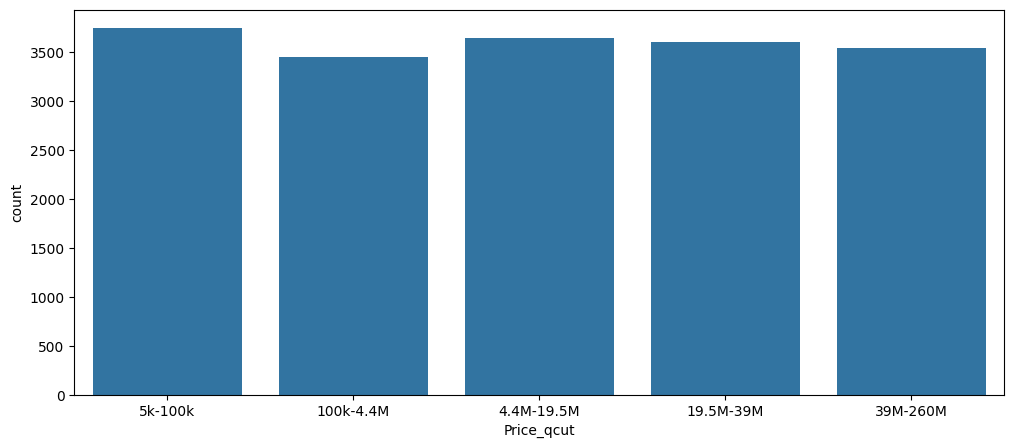

In [107]:
plt.figure(figsize=(12,5))
sns.barplot(zameen_data['Price_qcut'].value_counts())
plt.show

### **Barplot of Area qcut**

<function matplotlib.pyplot.show(close=None, block=None)>

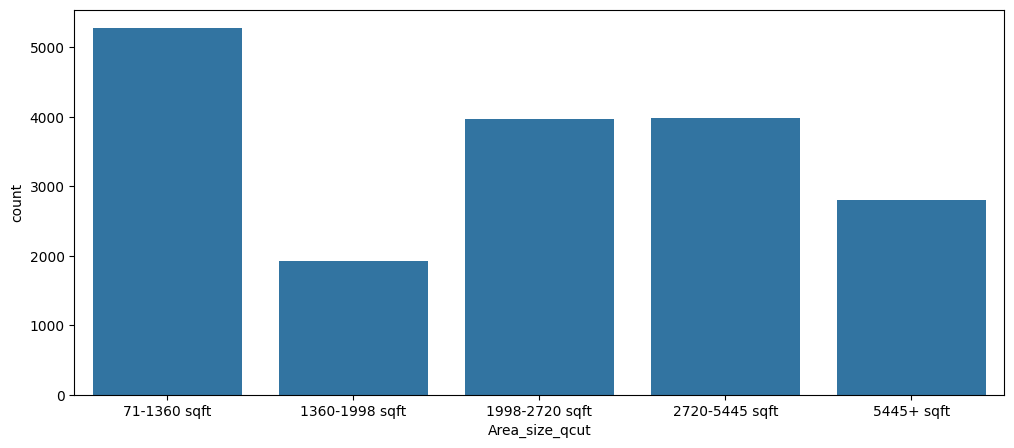

In [108]:
plt.figure(figsize=(12,5))
sns.barplot(zameen_data['Area_size_qcut'].value_counts())
plt.show

### **Barplot of Age of Property**

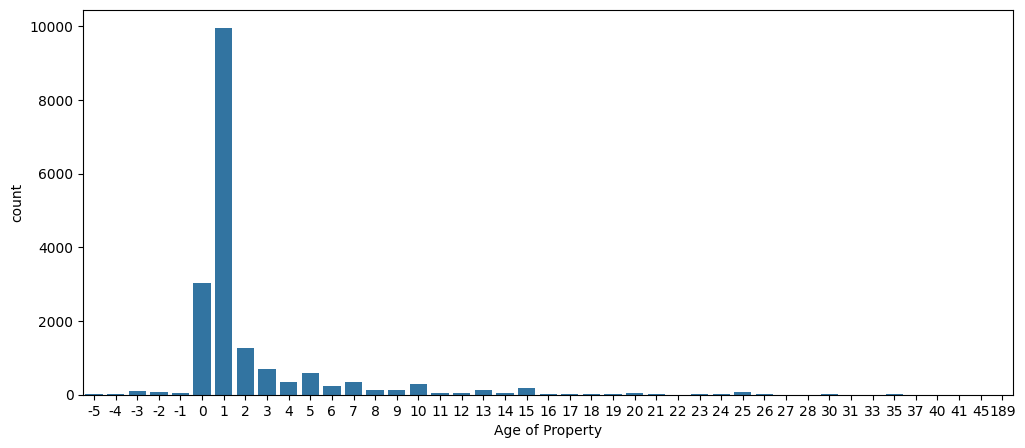

In [109]:
plt.figure(figsize=(12,5))
sns.barplot(zameen_data['Age of Property'].value_counts())
plt.show()

 ## **Correlation heatmap**

In [110]:
numeric_column_correlation = zameen_data[['Price','Area_sqft','Age of Property']]

In [111]:
correlation_matrix = numeric_column_correlation.corr(numeric_only = True)

In [112]:
correlation_matrix

,Price,Area_sqft,Age of Property
Price,1.000000,0.066641,-0.011279
Area_sqft,0.066641,1.000000,0.017498
Age of Property,-0.011279,0.017498,1.000000


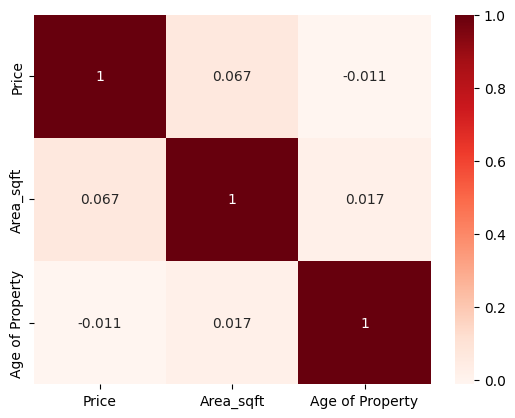

In [113]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'Reds')
plt.show()

## **Violin plots / box plots to compare prices by city, property type, bedrooms**

### **Violin Plot of Prices by City**

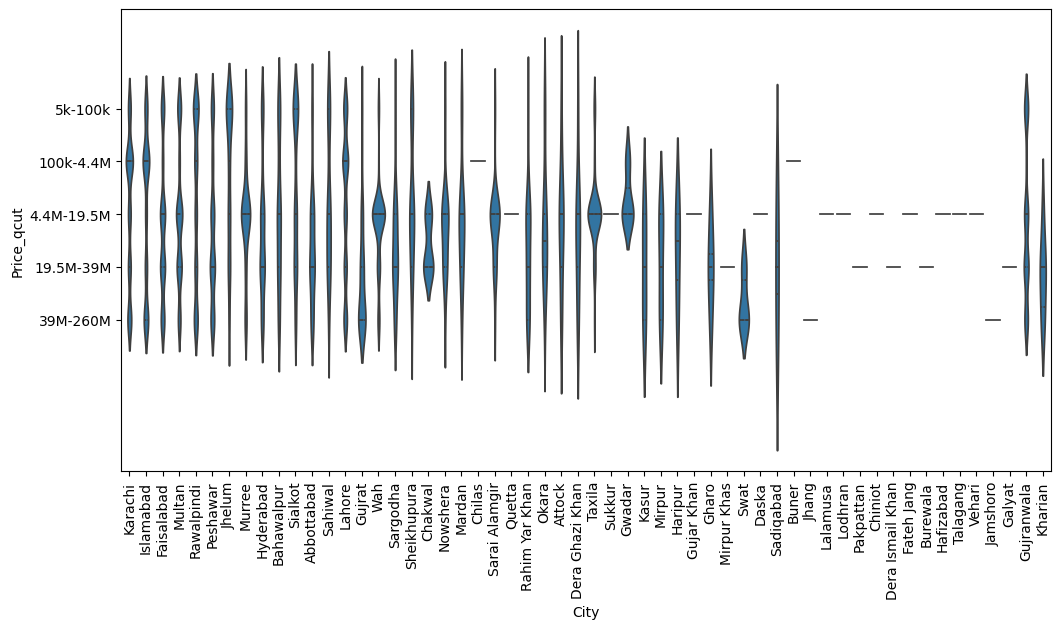

In [114]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.violinplot(x='City', y='Price_qcut', data=zameen_data, inner='quartile')
plt.show()

### **Violin plot of Prices by Property Type**

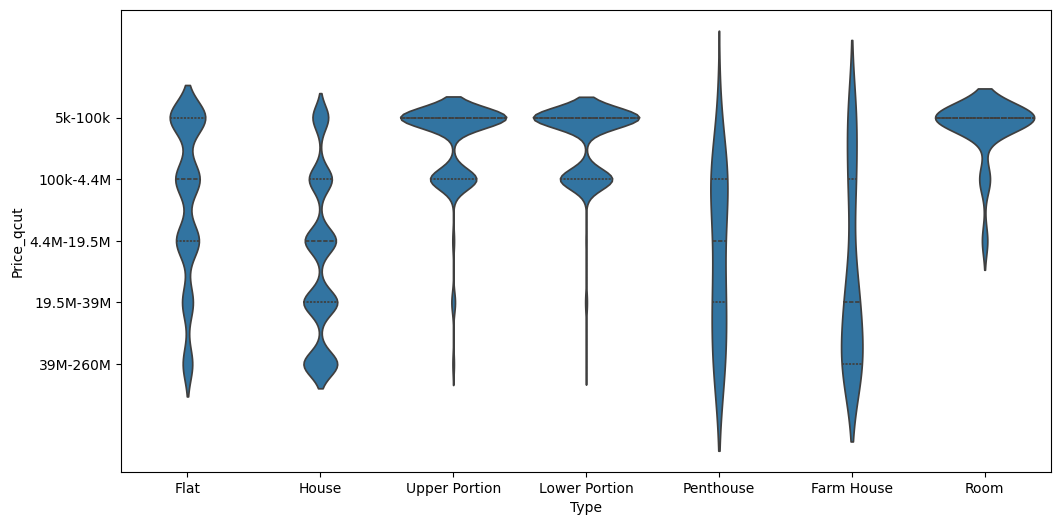

In [115]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Type', y= 'Price_qcut', data=zameen_data, inner='quartile')
plt.show()

### **Violin plot of Prices by Bedrooms **

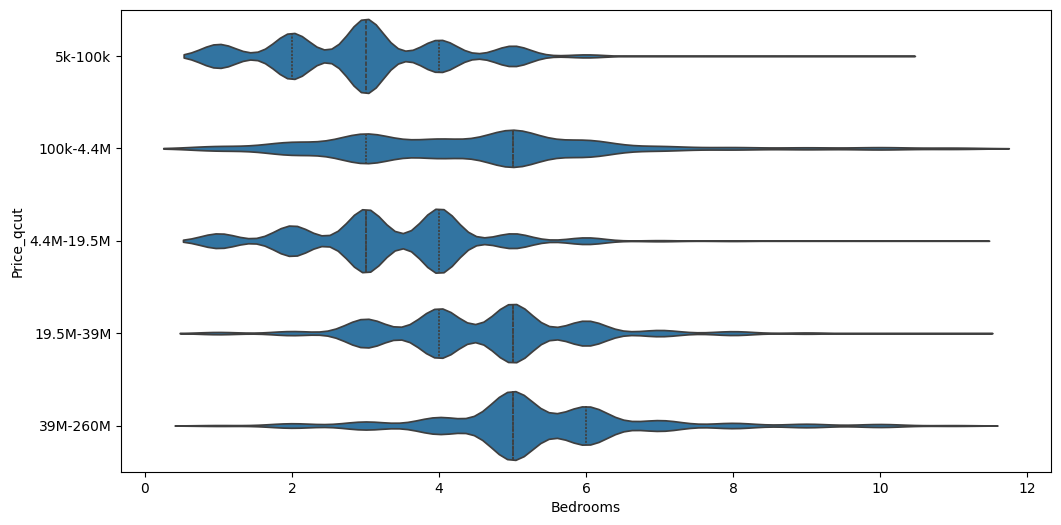

In [116]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Bedrooms', y= 'Price_qcut', data=zameen_data, inner='quartile')
plt.show()

# **7. Insights & Recommendations**

Use: domain logic + stats

1. The highest number of property listings (around 3800) are listed in the price range 5k-100k which are for rent.

2. All the listings from 3000-3700 are listed between the price range 5k-260M which includes rental and for sale properties.

3. The number of listings are equally distributed in all price ranges.

4. Around 5100 property listings have an area of 71-1360 sqft. The lowest quantity of around 1900 listings have an area of 1360-1998 sqft. Around 2600 listings have the highest area of over 5445 sqft.

5. Area sqft and Age of Property show a weak correlation with Price and between each other. Price is not increasing area size and age of property.

6. The violin plot for property prices in various cities shows cities Islamabad, Karachi, Lahore, Gujranwala, Sialkot, Faisalabad and Rawalpindi have the highest real estate rates for rent and sale. The long vertical line for city Islamabad indicates that price variation is the greatest in Islamabad. Given the higher population and status as the main economic centers of the country, property demand is greater and the business is booming there.

7. Despite the greater property supply, property valuations are still very high. More supply of properties should keep the prices low but they are significantly higher. It is also a normal practice in Pakistan to speculate property rates which inflates overall property rates in the market.

8. In smaller cities like Chilas, Buner, Jhang, etc. the flat horizontal line indicates lesser price variation and that property rates are in the middle of the total price range in this dataset. Property is cheaper because the demand for developing and purchasing property is lower in small undeveloped cities including the northern areas.

9. Room listings are mostly concentrated in the price range 5k-100k which is primarily for rent. The farmhouses and penthouses are thinly stretched between low and high price range. It indicates that fewer listings are available for rent and sale. Houses and flats are equally spread in all price ranges which indicates that most people are in the market for houses and flats for sale and rent. Upper and lower portion listings are in the market for rent primarily which is exhibited by the price range betweek 5k-1M.

10. For 5k-100k, 2-4 bedrooms are listed for rent and between 4.4M-19.5M they are listed for sale. 4-6 bedroom listings are priced between 19.5M-260M for sale. This data also indicates that 1-6 bedrooms are most common in listings which indicates demand for it. A large portion of 4 bedroom listings are also priced between 19.5-39M.

11. Most of the listings on zameen are aged 0-3 years from current year 2025. It indicates that most of the projects were completed in recent years and now they are up for rent or sale.

# **8. Conclusion & Next Steps**

## **Summary of learnings**

1. Property prices are most definately determined by location, size and type of property. Big cities have more expensive properties than small cities.
2. However, prices are not correlated to area and age of property as per the data.
3. Most of the prices on zameen are also based on speculation. The sellers distort the actual property prices to increase their profits and property prices in future based on mere guesswork.
4. In the absence of a clear price framework, we cannot clean the inflated property prices which is a clear challenge in analyzing the dataset.

## **Suggestions for stakeholders (investors)**

1. Stakeholders should make effort towards creating a regulated real estate market to prevent speculative pricing.
2. Invest in major cities of Pakistan where property rates are higher due to better administration and access to amenities.
3. Despite, the slow market, there is a demand for property but pricing should be reasonable to improve sales.
4. Many previous projects that were completed in the past 3 years will struggle to sell because of high cost of construction and low purchasing power in the market. Hence, consider all the costs and development time before starting a new project or investing in developing projects.

In [117]:
zameen_data.to_csv('zameen_data_cleaned.csv')